In [20]:
# https://theailearner.com/2019/04/18/histogram-backprojection/
import cv2
import numpy as np
import matplotlib.pyplot as plt
#roi is the object or region of object we need to find
roi = cv2.imread('ground.jpg')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
#target is the image we search in
target = cv2.imread('messi.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# Find the histograms using calcHist.
M = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv2.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

In [21]:
# cv2.imshow('image', roi)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

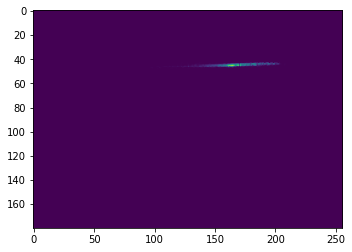

In [22]:
plt.imshow(M)
plt.show()

In [23]:
R = M/I

/tmp/ipykernel_11039/2314269407.py:1: RuntimeWarning: divide by zero encountered in true_divide
  R = M/I
/tmp/ipykernel_11039/2314269407.py:1: RuntimeWarning: invalid value encountered in true_divide
  R = M/I


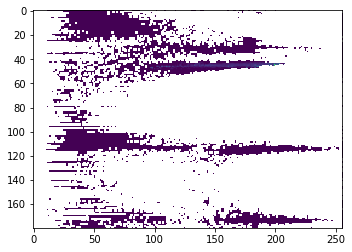

In [24]:
plt.imshow(R)
plt.show()

In [25]:
h,s,v = cv2.split(hsvt)

In [26]:
B = R[h.ravel(),s.ravel()]

In [27]:
B

array([0.        , 0.        , 0.        , ..., 0.42672414, 0.2781955 ,
       0.24770643], dtype=float32)

In [28]:
B.max()

3.0

In [29]:
B = np.minimum(B,1)

In [30]:
B.max()

1.0

In [31]:
B = B.reshape(hsvt.shape[:2])

In [32]:
# apply a convolution with a circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

In [33]:
disc

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [34]:
B = cv2.filter2D(B,-1,disc)
B = np.uint8(B)
cv2.normalize(B,B,0,255,cv2.NORM_MINMAX)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [109, 109,  91, ...,  36,  36,  36],
       [109, 109,  91, ...,  55,  55,  55],
       [109, 109,  91, ...,  73,  73,  73]], dtype=uint8)

In [35]:
# Use thresholding to segment out the region
ret,thresh = cv2.threshold(B,10,255,0)

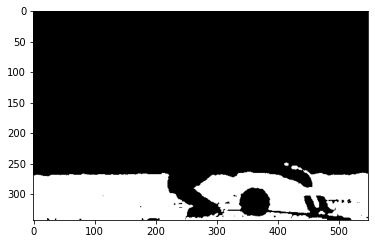

In [36]:
plt.imshow(thresh, cmap='gray')
plt.show()

In [37]:
# Overlay images using bitwise_and
thresh = cv2.merge((thresh,thresh,thresh))
thresh.shape

(342, 548, 3)

In [38]:
res = cv2.bitwise_and(target,thresh)

# Display the output
cv2.imshow('Result',res)
cv2.waitKey(0)
cv2.destroyAllWindows()